## Teoría de perturbaciones

Consiste en resolver un sistema perturbado(se conoce la solución al no perturbado), y donde el interés es conocer la contribución de la parte perturbada $H'$ al nuevo sistema total. 

$$ H = H^{0} + H'$$

Para sistemas no degenerados, la corrección a la energía a primer orden se calcula como 

$$ E_{n}^{(1)} = \int\psi_{n}^{(0)*} H' \psi_{n}^{(0)}d\tau$$

** Tarea 1 : Programar esta ecuación si conoces $H^{0}$ y sus soluciones. **

In [11]:
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
n = Abs(sympify(input('Valor de la energia: ')))
omega = sympify(input('Frecuencia Angular: '))

# Funcion de onda del hamiltoniano H.O no perturbado 
FunOnda = psi_n(n, x, m_e, omega)

#Energia del hamiltoniano no perturbado
E0 = E_n(n, omega)

#Se necesita definir el nuevo hamiltoniano agregando la perturbacion
H = ((-(hbar**2)/(2*m_e))*diff(FunOnda, x, 2) + FunOnda*(m_e*(omega*x)**2)/(2))+FunOnda*sympify(input('Perturbation: '))

#Producto interno
sandwich = conjugate(FunOnda)*H                                    
E = integrate(sandwich, (x, -oo,oo))
Error = (((E-E0)*100)/E0)
E





Valor de la energia: 1
Frecuencia Angular: 1
Perturbation: 0


       2         
0.75⋅h̅          
──────── + 0.75⋅ℏ
   ℏ             

Y la corrección a la función de onda, también a primer orden, se obtiene como:

 $$ \psi_{n}^{(1)} = \sum_{m\neq n} \frac{\langle\psi_{m}^{(0)} | H' | \psi_{n}^{(0)} \rangle}{E_{n}^{(0)} - E_{m}^{(0)}} \psi_{m}^{(0)}$$

**Tarea 2: Programar esta ecuación si conoces $H^{0}$ y sus soluciones. **

Nivel de energia para la correcion de la funcion de onda: 1
Nivel mas alto de energia:5
Frecuencia Angular: 1
Perturbacion: x**3


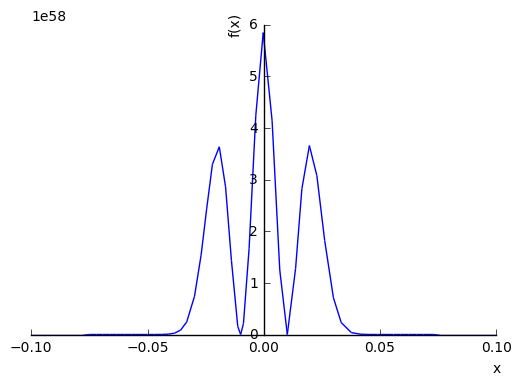

In [12]:
### Solución
#Importar de sympy el hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Nivel de energia, sobre el cual realizar la corrección
n = Abs(sympify(input('Nivel de energia para la correcion de la funcion de onda: ')))
i= Abs(sympify(input('Nivel mas alto de energia:')))
omega = sympify(input('Frecuencia Angular: '))
#Funcion de onda no perturbada
FunOnda = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)

#Nuevo hamiltoniano, contiene el original y la perturbacion
H =  FunOnda*sympify(input('Perturbacion: '))

#Energia no perturbada del Hamiltoniano
E0 = E_n(n, omega)
psicorrec = 0

for m in range(i):
    if m !=n:
        psim= psi_n(m, x, m_e, omega)
        producto = conjugate(psim)*H
        sandwich = integrate(producto, (x,-oo,oo))
        Em = E_n(m, omega)
        correc = ((sandwich)/(E0-Em))*psim
        psicorrec = psicorrec + correc
    
    
    else:
        psicorrec = psicorrec
        
#Integral del producto interno
sandwich = conjugate(FunOnda)*H                                  
E = E0 + integrate(sandwich, (x, -oo,oo))
Error = (((E-E0)*100)/E0)

psipert = FunOnda + psicorrec
psipert.evalf()
psiplot = conjugate(psipert)*psipert
plot(psiplot,(x,-0.1,0.1))




**Tarea 3: Investigue las soluciones a segundo orden y también programe las soluciones. **

In [13]:
### Solución
#La forma para la corrección de la energía a segundo orden es parecida. Trabajamos con energía en vez de funciones de onda.
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Nivel de energia sobre la cual trabajamos 
n = Abs(sympify(input('Nivel de energia para la correcion de la funcion de onda: ')))
i= Abs(sympify(input('Nivel mas alto de energia:')))
omega = sympify(input('Frecuencia angular: '))
#Funcion de onda no perturbada
FunOnda = psi_n(n, x, m_e, omega)

#Energía antes de la perturbación
E0 = E_n(n, omega)

#Nuevo hamiltoniano, contiene el original y la perturbacion
H =  FunOnda*sympify(input('Perturbacion: '))
intepriorden = conjugate(FunOnda)*H
priorden = integrate (intepriorden, (x,-oo,oo))
#Energia del hamiltoniano no perturbado
E0 = E_n(n, omega)
Ecorrec = 0

#La primera parte de la corrección a 2º orden es la de primer orden
for m in range(i):
    if m !=n:
        psim= psi_n(m, x, m_e, omega)
        product = conjugate(psim)*H
        sandwich = integrate(product, (x,-oo,oo))
        Em = E_n(m, omega)
        corr = ((sandwich)**2/(E0-Em))
        Ecorrec = Ecorrec + corr
    
    
    else:
        Ecorrec = Ecorrec
        

E = E0 + priorden + Ecorrec

E





Nivel de energia para la correcion de la funcion de onda: 1
Nivel mas alto de energia:10
Frecuencia angular: 1
Perturbacion: x**3


                                                2      
                        2   1.883130520616e+59⋅ℏ    3⋅ℏ
- 1.17409001625997e+91⋅ℏ  - ───────────────────── + ───
                                      π              2 

**Tarea 4.  Resolver el átomo de helio aplicando los programas anteriores.** 

In [18]:
from sympy.physics.hydrogen import E_nl, R_nl
var('r1, r2, q', positive=True, real=True)



def Helium(N1,N2,L1,L2):
    
    Eb=E_nl(N1,1)+E_nl(N2,1)
    Psi1=R_nl(N1, L1, r1, Z=1)
    Psi2=R_nl(N2, L2, r2, Z=1)
    Psi=Psi1*Psi2
    E_correction1 = integrate(integrate(r1**2*r2**2*conjugate(Psi1)*conjugate(Psi2)*q**2*Psi1*Psi2/abs(r1-r2), (r1,0,oo)), (r2,0,oo))
    E_correctionR1 = q**2*integrate(r2**2*conjugate(Psi2)*Psi2*(integrate(r1**2*conjugate(Psi1)*Psi1/r2, (r1,0,r2))+integrate(r1**2*conjugate(Psi1)*Psi1/r1, (r1,r2,oo))), (r2,0,oo))
    
    return Psi, Eb, E_correction1, E_correctionR1


    E_correction1, E_correctionR1
    
Helium (1,1,0,0)


⎛                       ∞                                          ⎞
⎜                       ⌠                                          ⎟
⎜                       ⎮            ∞                             ⎟
⎜                       ⎮            ⌠                             ⎟
⎜                       ⎮            ⎮   2  -2⋅r₁                 2⎟
⎜   -r₁  -r₂          2 ⎮   2  -2⋅r₂ ⎮ r₁ ⋅ℯ                   5⋅q ⎟
⎜4⋅ℯ   ⋅ℯ   , -1, 16⋅q ⋅⎮ r₂ ⋅ℯ     ⋅⎮ ────────── d(r₁) d(r₂), ────⎟
⎜                       ⎮            ⎮ │r₁ - r₂│                8  ⎟
⎜                       ⎮            ⌡                             ⎟
⎜                       ⎮            0                             ⎟
⎜                       ⌡                                          ⎟
⎝                       0                                          ⎠

**Tarea 5: Método variacional-perturbativo. **

Este método nos permite estimar de forma precisa $E^{(2)}$ y correcciones perturbativas de la energía de órdenes más elevados para el estado fundamental del sistema, sin evaluar sumas infinitas. Ver ecuación 9.38 del libro. 

**Resolver el átomo de helio, considerando este método (sección 9.4), como mejor le parezca. **

**Tarea 6. Revisar sección 9.7. **

Inicialmente a mano, y sengunda instancia favor de intentar programar sección del problema, i.e. integral de Coulomb  e integral de intercambio.

## Siguiente: Segunda parte, Octubre
Simetrías moleculares y Hartree-Fock